In [1]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
# ดึงข้อมูลหุ้น AOT
stock_symbol = "CPALL.BK"  # สำหรับตลาดหลักทรัพย์ไทย (SET)
df = yf.download(stock_symbol, start="2020-01-01", end="2023-12-31")
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CPALL.BK,CPALL.BK,CPALL.BK,CPALL.BK,CPALL.BK
Date,,,,,
2020-01-02,66.132248,68.227988,66.132248,67.529408,59974000
2020-01-03,66.830826,67.296546,65.899386,66.132246,28716700
2020-01-06,66.365112,67.529413,66.365112,66.365112,19710500
2020-01-07,67.296547,67.762267,66.597967,67.063687,21754400
2020-01-08,67.529396,67.529396,66.830816,67.063676,25061200


In [3]:
# เช็คข้อมูลที่หายไป
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Price   Ticker  
Close   CPALL.BK    0
High    CPALL.BK    0
Low     CPALL.BK    0
Open    CPALL.BK    0
Volume  CPALL.BK    0
dtype: int64


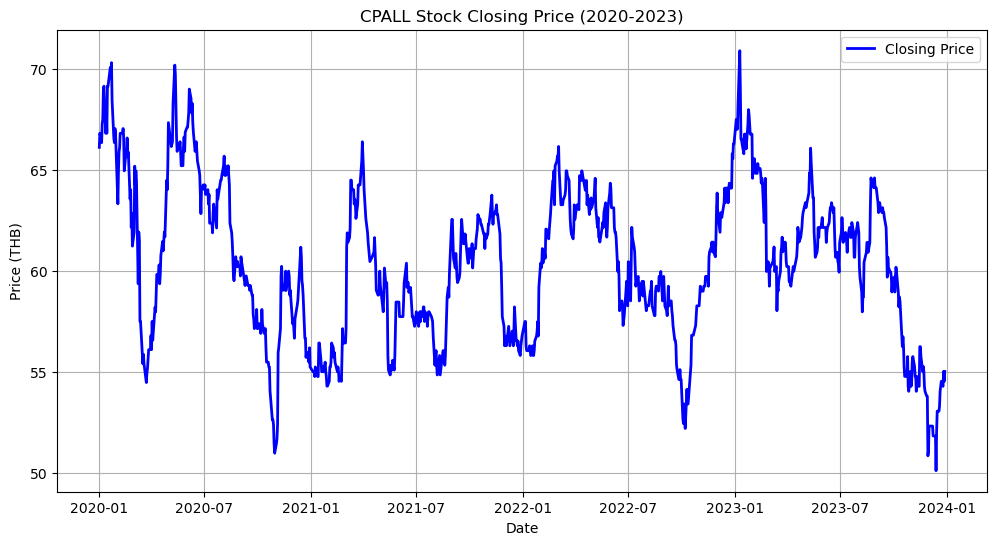

In [4]:
# สร้างกราฟราคาปิดของหุ้น AOT
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", linewidth=2, color='blue')

plt.title("CPALL Stock Closing Price (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid()

# แสดงกราฟ
plt.show()

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


data = df[["Close"]].values

# สเกลข้อมูลให้อยู่ในช่วง 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# ฟังก์ชันสร้างชุดข้อมูลแบบ Time Series
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# ตั้งค่าช่วงเวลา 60 วันย้อนหลังเพื่อพยากรณ์วันถัดไป
time_step = 60
X, Y = create_dataset(scaled_data, time_step)

# แบ่ง Train-Test (80-20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# แปลงให้เป็นรูปแบบที่เหมาะสมกับ LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# สร้างโมเดล LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# คอมไพล์โมเดล
model.compile(optimizer="adam", loss="mean_squared_error")

# เทรนโมเดล
model.fit(X_train, Y_train, batch_size=16, epochs=50, verbose=1)

# ทำการพยากรณ์ปี 2024
future_days = 2000  # จำนวนวันที่ต้องการทำนาย
future_predictions = []

# ใช้ข้อมูล 60 วันสุดท้ายเป็นจุดเริ่มต้น
last_60_days = scaled_data[-time_step:].reshape(1, time_step, 1)

for _ in range(future_days):
    pred = model.predict(last_60_days, verbose=0)
    pred = pred.reshape(1, 1, 1)  # แปลงให้มีขนาด 3 มิติ
    future_predictions.append(pred[0, 0])
    last_60_days = np.append(last_60_days[:, 1:, :], pred, axis=1)

# แปลงค่ากลับเป็นราคาหุ้นจริง
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# แปลง last_date ให้เป็น datetime
last_date = pd.to_datetime(df.index[-1])

# สร้างช่วงวันที่สำหรับปี 2024
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days, freq='D')

Epoch 1/50
46/46 [==============================] - 38s 305ms/step - loss: 0.0304
Epoch 2/50
46/46 [==============================] - 14s 312ms/step - loss: 0.0088
Epoch 3/50
46/46 [==============================] - 14s 301ms/step - loss: 0.0063
Epoch 4/50
46/46 [==============================] - 14s 316ms/step - loss: 0.0056
Epoch 5/50
46/46 [==============================] - 15s 321ms/step - loss: 0.0048
Epoch 6/50
46/46 [==============================] - 14s 318ms/step - loss: 0.0045
Epoch 7/50
46/46 [==============================] - 15s 319ms/step - loss: 0.0041
Epoch 8/50
46/46 [==============================] - 17s 380ms/step - loss: 0.0038
Epoch 9/50
46/46 [==============================] - 16s 356ms/step - loss: 0.0038
Epoch 10/50
46/46 [==============================] - 15s 318ms/step - loss: 0.0032
Epoch 11/50
46/46 [==============================] - 14s 312ms/step - loss: 0.0030
Epoch 12/50
46/46 [==============================] - 17s 372ms/step - loss: 0.0026
Epoch 13/50
4

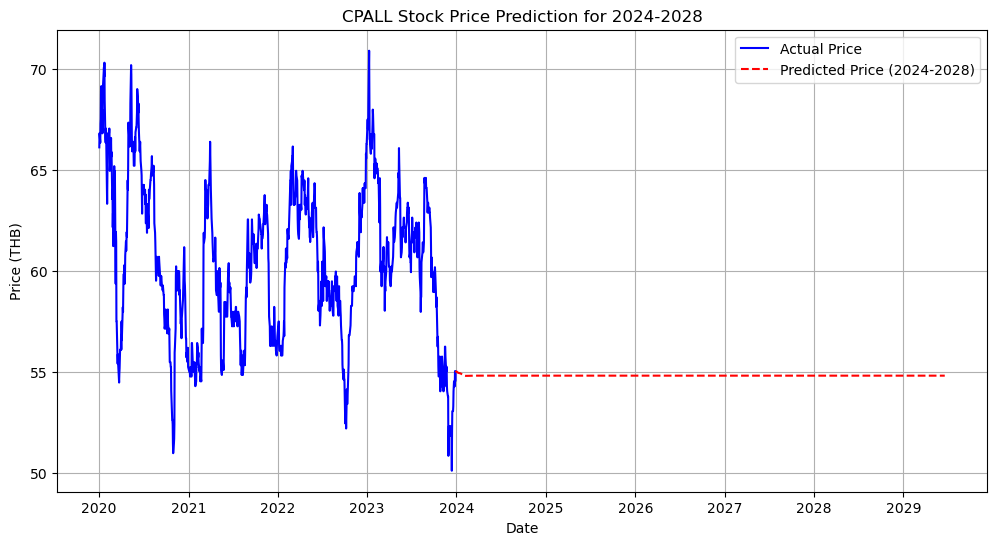

In [25]:
# ตรวจสอบและแปลง df.index และ future_dates เป็น datetime
df.index = pd.to_datetime(df.index, errors="coerce")
future_dates = pd.to_datetime(future_dates, errors="coerce")

# วาดกราฟทำนายราคาหุ้นปี 2024-2028
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual Price", color="blue")
plt.plot(future_dates, future_predictions, label="Predicted Price (2024-2028)", color="red", linestyle="dashed")
plt.title("CPALL Stock Price Prediction for 2024-2028")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/envs/stock_prediction/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


2/2 [==============================] - 0s 37ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

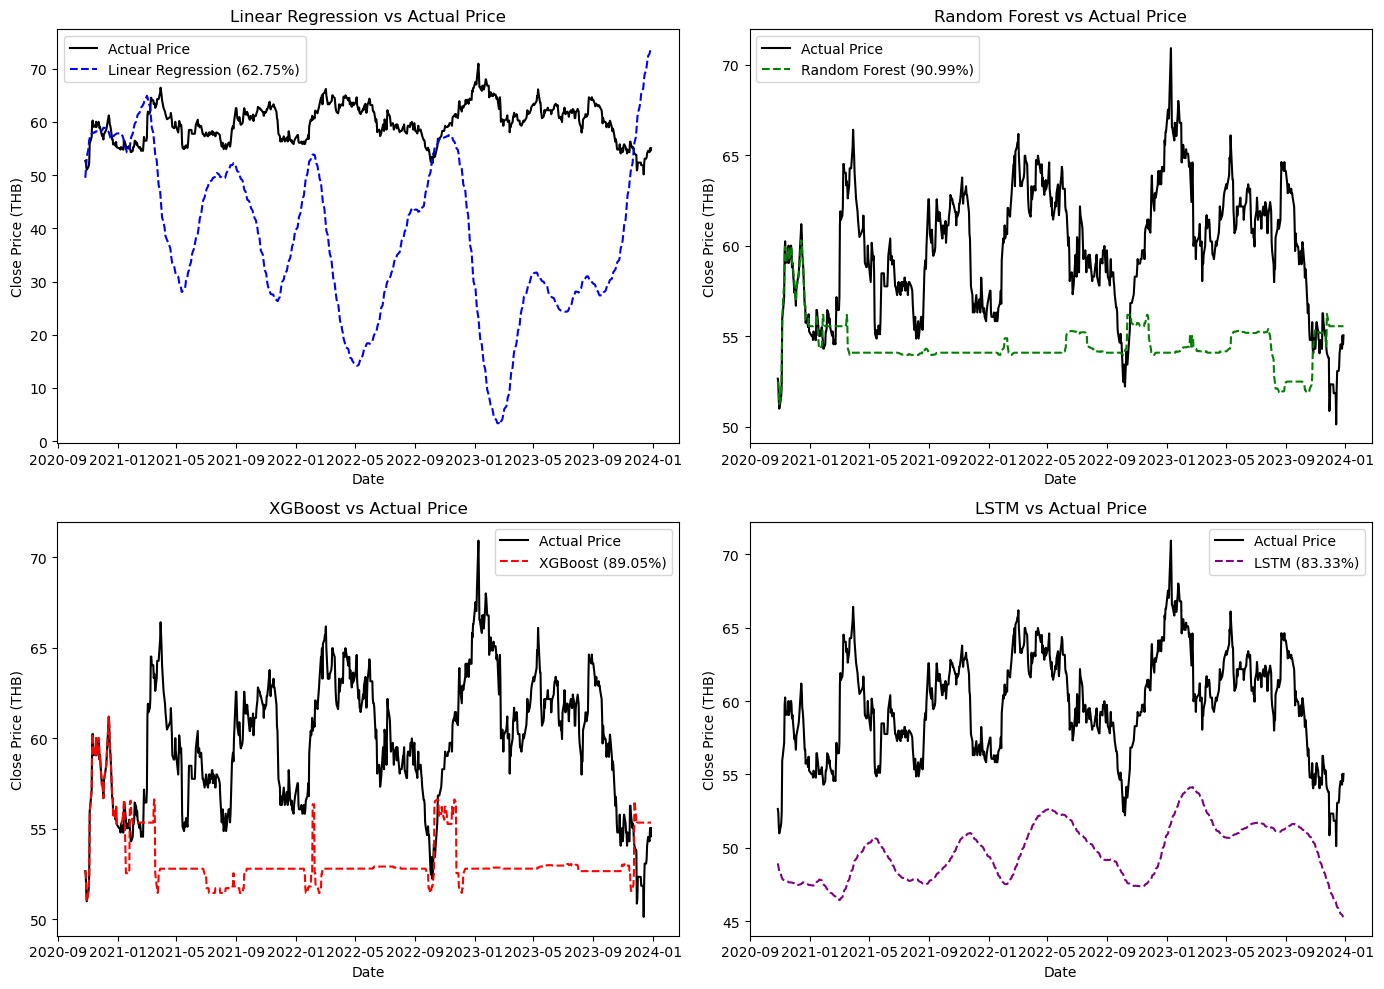

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# โหลดข้อมูลหุ้น (ถึงปี 2024)
ticker = "CPALL.BK"
data = yf.download(ticker, start="2020-01-01", end="2023-12-31")
data = data[['Close']].dropna()

# สร้างฟีเจอร์ Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# แบ่งข้อมูล Train/Test
train = data[:'2020']
test = data[:'2024']  # ใช้ปี 2024 เป็น Test Data

X_train, y_train = train.drop(columns=['Close']), train['Close']
X_test, y_test = test.drop(columns=['Close']), test['Close']

# ---------- เทรนโมเดล ----------
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=20, verbose=0)
y_pred_lstm = model.predict(X_test_lstm).flatten()

# ---------- คำนวณความแม่นยำ (MAPE) ----------
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm) * 100

confidence_scores = {
    "Linear Regression": 100 - mape_lr,
    "Random Forest": 100 - mape_rf,
    "XGBoost": 100 - mape_xgb,
    "LSTM": 100 - mape_lstm
}

# ---------- พยากรณ์ 2025-2026 ----------
future_dates = pd.date_range(start="2024-01-01", periods=730, freq='D')
future_features = X_train.iloc[-730:].values  # ใช้ข้อมูลล่าสุด

future_pred_lr = lr.predict(future_features)
future_pred_rf = rf.predict(future_features)
future_pred_xgb = xgb.predict(future_features)

future_features_lstm = np.array(future_features).reshape((future_features.shape[0], future_features.shape[1], 1))
future_pred_lstm = model.predict(future_features_lstm).flatten()

# ---------- พล็อตกราฟแยกสำหรับแต่ละโมเดลเทียบกับข้อมูลจริง ----------
plt.figure(figsize=(14, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lr, label=f"Linear Regression ({confidence_scores['Linear Regression']:.2f}%)", linestyle="dashed", color="blue")
plt.title("Linear Regression vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# Random Forest
plt.subplot(2, 2, 2)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_rf, label=f"Random Forest ({confidence_scores['Random Forest']:.2f}%)", linestyle="dashed", color="green")
plt.title("Random Forest vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# XGBoost
plt.subplot(2, 2, 3)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_xgb, label=f"XGBoost ({confidence_scores['XGBoost']:.2f}%)", linestyle="dashed", color="red")
plt.title("XGBoost vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# LSTM
plt.subplot(2, 2, 4)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lstm, label=f"LSTM ({confidence_scores['LSTM']:.2f}%)", linestyle="dashed", color="purple")
plt.title("LSTM vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

plt.tight_layout()
plt.show